In [1]:
import pandas as pd

def generate_dictionaries(input_excel, output_txt):
    """
    Read Excel file and generate a text file with MARKET_TICKERS list and COMPANY_TO_TICKER dictionary.
    
    Args:
        input_excel (str): Path to input Excel file
        output_txt (str): Path to output text file
    """
    # Read Excel file
    df = pd.read_excel(input_excel)
    
    # Create the text file content
    with open(output_txt, 'w', encoding='utf-8') as f:
        # Write MARKET_TICKERS
        f.write("MARKET_TICKERS = [\n")
        tickers = [f'    "{ticker}"' for ticker in df['Ticker']]
        f.write(",\n".join(tickers))
        f.write("\n]\n\n")
        
        # Write COMPANY_TO_TICKER
        f.write("COMPANY_TO_TICKER = {\n")
        company_tickers = [f'    "{company}": "{ticker}"' 
                         for company, ticker in zip(df['Name'], df['Ticker'])]
        f.write(",\n".join(company_tickers))
        f.write("\n}\n")

if __name__ == "__main__":
    # Example usage
    input_file = "Tickers.xlsx"
    output_file = "market_tickers.txt"
    
    try:
        generate_dictionaries(input_file, output_file)
        print(f"Successfully generated {output_file}")
    except Exception as e:
        print(f"Error: {str(e)}")

Successfully generated market_tickers.txt


In [2]:
import ast

def read_dictionaries_from_file(filepath):
    """
    Read MARKET_TICKERS list and COMPANY_TO_TICKER dictionary from a text file.
    
    Args:
        filepath (str): Path to the text file containing the dictionaries
        
    Returns:
        tuple: (MARKET_TICKERS list, COMPANY_TO_TICKER dictionary)
    """
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            content = f.read()
            
            # Split content into two parts based on the dictionary definitions
            parts = content.split('\n\n')
            
            # Extract MARKET_TICKERS
            tickers_str = parts[0].replace('MARKET_TICKERS = ', '')
            market_tickers = ast.literal_eval(tickers_str)
            
            # Extract COMPANY_TO_TICKER
            company_dict_str = parts[1].replace('COMPANY_TO_TICKER = ', '')
            company_to_ticker = ast.literal_eval(company_dict_str)
            
            return market_tickers, company_to_ticker
            
    except FileNotFoundError:
        print(f"Error: File {filepath} not found")
        return [], {}
    except Exception as e:
        print(f"Error reading dictionaries: {str(e)}")
        return [], {}

# Example usage in your scraper:
def initialize_ticker_data(filepath='market_tickers.txt'):
    """
    Initialize ticker data from the text file for use in the scraper.
    
    Args:
        filepath (str): Path to the ticker data file
        
    Returns:
        tuple: (market_tickers list, company_to_ticker dictionary)
    """
    market_tickers, company_to_ticker = read_dictionaries_from_file(filepath)
    
    if not market_tickers or not company_to_ticker:
        print("Warning: Failed to load ticker data from file")
        return [], {}
        
    print(f"Successfully loaded {len(market_tickers)} tickers and {len(company_to_ticker)} company mappings")
    return market_tickers, company_to_ticker

# Usage in your main scraper code:
if __name__ == "__main__":
    # Load the ticker data
    MARKET_TICKERS, COMPANY_TO_TICKER = initialize_ticker_data()
    
    # Now you can use MARKET_TICKERS and COMPANY_TO_TICKER in your scraper
    print(f"Number of tickers: {len(MARKET_TICKERS)}")
    print(f"Number of company mappings: {len(COMPANY_TO_TICKER)}")
    
    # Example of accessing the data
    print("\nFirst 5 tickers:")
    for ticker in MARKET_TICKERS[:5]:
        print(ticker)
        
    print("\nFirst 5 company mappings:")
    for company, ticker in list(COMPANY_TO_TICKER.items())[:5]:
        print(f"{company}: {ticker}")

Successfully loaded 1059 tickers and 1048 company mappings
Number of tickers: 1059
Number of company mappings: 1048

First 5 tickers:
AMKBY
AACAY
AAALY
ABT
ABBV

First 5 company mappings:
A.P. Moller – Maersk A/S: AMKBY
AAC Technologies Holdings: AACAY
Aareal Bank AG: AAALY
Abbott Laboratories: ABT
AbbVie Inc.: ABBV


In [1]:
MARKET_TICKERS = [
    "MMM", "ACE", "ABT", "ANF", "ACN", "ADBE", "AMD", "AES", "AET", "AFL",
    "GAS", "APD", "ARG", "AKAM", "AA", "ALXN", "ATI", "AGN",
    "ANR", "ALTR", "MO", "AMZN", "AEE", "AEP", "AXP", "AIG", "AMT", "AMP",
    "ABC", "AMGN", "APH", "APC", "ADI", "AON", "APA", "AIV", "APOL", "AAPL",
    "AMAT", "ADM", "AIZ", "ADSK", "ADP", "AZO", "AVB", "AVY",
    "AVP", "BHI", "BLL", "BAC", "BK", "BCR", "BAX", "BBT", "BEAM", "BDX",
    "BBBY", "BMS", "BRK.B", "BBY", "BIIB", "BLK", "HRB", "BMC", "BA",
    "BWA", "BXP", "BSX", "BMY", "BRCM", "BF.B", "CHRW", "CA", "CVC", "COG",
    "CAM", "CPB", "COF", "CAH", "CFN", "KMX", "CCL", "CBG", "CBS",
    "CELG", "CNP", "CTL", "CERN", "CF", "SCHW", "CHK", "CVX", "CMG", "CB",
    "CI", "CINF", "CTAS", "CSCO", "C", "CTXS", "CLF", "CLX", "CME", "CMS",
    "COH", "KO", "CCE", "CTSH", "CL", "CMCSA", "CMA", "CSC", "CAG", "COP",
    "CNX", "ED", "STZ", "CBE", "GLW", "CVH", "COV", "CCI", "CSX",
    "CMI", "CVS", "DHI", "DHR", "DRI", "DVA", "DF", "DE", "DELL", "DNR",
    "XRAY", "DVN", "DV", "DTV", "DFS", "DISCA", "DLTR", "RRD",
    "DOV", "DOW", "DPS", "DTE", "DUK", "DNB", "ETFC", "EMN", "ETN",
    "EBAY", "ECL", "EIX", "EW", "EA", "EMC", "EMR", "ESV", "ETR", "EOG",
    "EQT", "EFX", "EQR", "EL", "EXC", "EXPE", "EXPD", "ESRX", "XOM", "FFIV",
    "FDO", "FAST", "FII", "FDX", "FIS", "FITB", "FHN", "FSLR", "FE", "FISV",
    "FLIR", "FLS", "FLR", "FMC", "FTI", "F", "FRX", "FOSL", "BEN", "FCX",
    "FTR", "GME", "GCI", "GPS", "GD", "GE", "GIS", "GPC", "GNW", "GILD",
    "GS", "GT", "GOOG", "GWW", "HAL", "HOG", "HAR", "HRS", "HIG",
    "HCP", "HCN", "HNZ", "HP", "HES", "HPQ", "HD", "HON", "HRL", "HSP",
    "HST", "HCBK", "HUM", "HBAN", "ITW", "IR", "TEG", "INTC", "ICE", "IBM",
    "IFF", "IGT", "IP", "IPG", "INTU", "ISRG", "IVZ", "IRM", "JBL", "JEC",
    "JDSU", "JNJ", "JCI", "JPM", "JNPR", "K", "KEY", "KMB", "KIM",
    "KMI", "KLAC", "KSS", "KFT", "KR", "LLL", "LH", "LRCX", "LM", "LEG",
    "LEN", "LUK", "LXK", "LLY", "LTD", "LNC", "LLTC", "LMT", "L",
    "LO", "LSI", "MTB", "MRO", "MPC", "MAR", "MMC", "MAS",
    "MA", "MAT", "MKC", "MCD", "MHP", "MCK", "MJN", "MWV", "MDT", "MRK",
    "MET", "PCS", "MCHP", "MU", "MSFT", "MOLX", "TAP", "MON", "MNST", "MCO",
    "MS", "MOS", "MSI", "MUR", "MYL", "NBR", "NDAQ", "NOV", "NTAP", "NFLX",
    "NWL", "NFX", "NEM", "NWSA", "NEE", "NKE", "NI", "NE", "NBL", "JWN",
    "NSC", "NTRS", "NOC", "NU", "NRG", "NUE", "NVDA", "NYX", "ORLY", "OXY",
    "OMC", "OKE", "ORCL", "OI", "PCAR", "PLL", "PH", "PDCO", "PAYX", "BTU",
    "JCP", "PBCT", "POM", "PEP", "PKI", "PRGO", "PFE", "PCG", "PM", "PSX",
    "PNW", "PXD", "PBI", "PCL", "PNC", "RL", "PPG", "PPL", "PX", "PCP",
    "PCLN", "PFG", "PG", "PGR", "PLD", "PRU", "PEG", "PSA", "PHM", "QEP",
    "PWR", "QCOM", "DGX", "RRC", "RTN", "RHT", "RF", "RSG", "RAI", "RHI",
    "ROK", "COL", "ROP", "ROST", "RDC", "SWY", "SAI", "CRM", "SNDK",
    "SCG", "SLB", "SNI", "STX", "SHLD", "SRE", "SHW", "SIAL", "SPG",
    "SLM", "SJM", "SNA", "LUV", "SWN", "SE", "STJ", "SWK",
    "SPLS", "SBUX", "STT", "SRCL", "SYK", "SUN", "STI", "SYMC", "SYY",
    "TROW", "TGT", "TEL", "TE", "THC", "TDC", "TER", "TSO", "TXN", "TXT",
    "HSY", "TRV", "TMO", "TIF", "TWX", "TWC", "TIE", "TJX", "TMK", "TSS",
    "TRIP", "TSN", "TYC", "USB", "UNP", "UNH", "UPS", "UTX", "UNM",
    "URBN", "VFC", "VLO", "VAR", "VTR", "VRSN", "VZ", "VIAB", "V", "VNO",
    "VMC", "WMT", "WAG", "DIS", "WPO", "WM", "WAT", "WPI", "WLP", "WFC",
    "WDC", "WU", "WY", "WHR", "WFM", "WMB", "WEC", "WPX", "WYN",
    "WYNN", "XEL", "XRX", "XLNX", "XL", "XYL", "YHOO", "YUM", "ZMH", "ZION"
]

COMPANY_TO_TICKER = {
    '3M Co.': 'MMM',
    '3M': 'MMM',
    'ACE Limited': 'ACE',
    'ACE': 'ACE',
    'Abbott Laboratories': 'ABT',
    'Abercrombie & Fitch Company A': 'ANF',
    'Abercrombie & Fitch': 'ANF',
    'Accenture': 'ACN',
    'Adobe Systems Inc': 'ADBE',
    'Adobe Systems': 'ADBE',
    'Advanced Micro Devices': 'AMD',
    'AES Corp': 'AES',
    'AES': 'AES',
    'Aetna Inc': 'AET',
    'Aetna': 'AET',
    'AFLAC Inc': 'AFL',
    'AFLAC': 'AFL',
    'AGL Resources Inc.': 'GAS',
    'AGL Resources': 'GAS',
    'Air Products & Chemicals Inc': 'APD',
    'Air Products & Chemicals': 'APD',
    'Airgas Inc': 'ARG',
    'Airgas': 'ARG',
    'Akamai Technologies Inc': 'AKAM',
    'Akamai Technologies': 'AKAM',
    'Alcoa Inc': 'AA',
    'Alcoa': 'AA',
    'Alexion Pharmaceuticals': 'ALXN',
    'Allegheny Technologies Inc': 'ATI',
    'Allegheny Technologies': 'ATI',
    'Allergan Inc': 'AGN',
    'Allergan': 'AGN',
    'Alpha Natural Resources': 'ANR',
    'Altera Corp': 'ALTR',
    'Altera': 'ALTR',
    'Altria Group Inc': 'MO',
    'Altria Group': 'MO',
    'Amazon.com Inc': 'AMZN',
    'Amazon.com': 'AMZN',
    'Amazon': 'AMZN',
    'Ameren Corp': 'AEE',
    'Ameren': 'AEE',
    'American Electric Power': 'AEP',
    'American Express Co': 'AXP',
    'American Express': 'AXP',
    'American Intl Group Inc': 'AIG',
    'American Intl Group': 'AIG',
    'AIG': 'AIG',
    'American Tower Corp A': 'AMT',
    'American Tower': 'AMT',
    'Ameriprise Financial': 'AMP',
    'AmerisourceBergen Corp': 'ABC',
    'AmerisourceBergen': 'ABC',
    'Amgen Inc': 'AMGN',
    'Amgen': 'AMGN',
    'Amphenol Corp A': 'APH',
    'Amphenol': 'APH',
    'Anadarko Petroleum Corp': 'APC',
    'Anadarko Petroleum': 'APC',
    'Anadarko': 'APC',
    'Analog Devices Inc': 'ADI',
    'Analog Devices': 'ADI',
    'Aon plc': 'AON',
    'Aon': 'AON',
    'Apache Corporation': 'APA',
    'Apache': 'APA',
    'Apartment Investment & Mgmt': 'AIV',
    'Apollo Group Inc': 'APOL',
    'Apollo Group': 'APOL',
    'Apple Inc.': 'AAPL',
    'Apple': 'AAPL',
    'Applied Materials Inc': 'AMAT',
    'Applied Materials': 'AMAT',
    'Archer-Daniels-Midland Co': 'ADM',
    'Archer-Daniels-Midland': 'ADM',
    'ADM': 'ADM',
    'Assurant Inc': 'AIZ',
    'Assurant': 'AIZ',
    'Autodesk Inc': 'ADSK',
    'Autodesk': 'ADSK',
    'Automatic Data Processing': 'ADP',
    'ADP': 'ADP',
    'AutoZone Inc': 'AZO',
    'AutoZone': 'AZO',
    'AvalonBay Communities, Inc.': 'AVB',
    'AvalonBay Communities': 'AVB',
    'Avery Dennison Corp': 'AVY',
    'Avery Dennison': 'AVY',
    'Avon Products': 'AVP',
    'Avon': 'AVP',
    'Baker Hughes Inc': 'BHI',
    'Baker Hughes': 'BHI',
    'Ball Corp': 'BLL',
    'Ball': 'BLL',
    'Bank of America Corp': 'BAC',
    'Bank of America': 'BAC',
    'BofA': 'BAC',
    'The Bank of New York Mellon Corp.': 'BK',
    'Bank of New York Mellon': 'BK',
    'BNY Mellon': 'BK',
    'Bard (C.R.) Inc.': 'BCR',
    'Bard': 'BCR',
    'Baxter International Inc.': 'BAX',
    'Baxter International': 'BAX',
    'Baxter': 'BAX',
    'BB&T Corporation': 'BBT',
    'BB&T': 'BBT',
    'Beam Inc.': 'BEAM',
    'Beam': 'BEAM',
    'Becton Dickinson': 'BDX',
    'Bed Bath & Beyond': 'BBBY',
    'Bemis Company': 'BMS',
    'Bemis': 'BMS',
    'Berkshire Hathaway': 'BRK.B',
    'Best Buy Co. Inc.': 'BBY',
    'Best Buy': 'BBY',
    'BIOGEN IDEC Inc.': 'BIIB',
    'BIOGEN IDEC': 'BIIB',
    'Biogen': 'BIIB',
    'BlackRock': 'BLK',
    'Block H&R': 'HRB',
    'H&R Block': 'HRB',
    'BMC Software': 'BMC',
    'Boeing Company': 'BA',
    'Boeing': 'BA',
    'BorgWarner': 'BWA',
    'Boston Properties': 'BXP',
    'Boston Scientific': 'BSX',
    'Bristol-Myers Squibb': 'BMY',
    'Broadcom Corporation': 'BRCM',
    'Broadcom': 'BRCM',
    'Brown-Forman Corporation': 'BF.B',
    'Brown-Forman': 'BF.B',
    'Cintas Corporation': 'CTAS',
    'Cintas': 'CTAS',
    'Cisco Systems': 'CSCO',
    'Cisco': 'CSCO',
    'Citigroup Inc.': 'C',
    'Citigroup': 'C',
    'Citi': 'C',
    'Citrix Systems': 'CTXS',
    'Citrix': 'CTXS',
    'Cliffs Natural Resources': 'CLF',
    'Clorox Co.': 'CLX',
    'Clorox': 'CLX',
    'CME Group Inc.': 'CME',
    'CME Group': 'CME',
    'CME': 'CME',
    'CMS Energy': 'CMS',
    'Coach Inc.': 'COH',
    'Coach': 'COH',
    'Coca Cola Co.': 'KO',
    'Coca Cola': 'KO',
    'Coke': 'KO',
    'Coca-Cola Enterprises': 'CCE',
    'Cognizant Technology Solutions': 'CTSH',
    'Cognizant': 'CTSH',
    'Colgate-Palmolive': 'CL',
    'Colgate': 'CL',
    'Comcast Corp.': 'CMCSA',
    'Comcast': 'CMCSA',
    'Comerica Inc.': 'CMA',
    'Comerica': 'CMA',
    'Computer Sciences Corp.': 'CSC',
    'Computer Sciences': 'CSC',
    'ConAgra Foods Inc.': 'CAG',
    'ConAgra Foods': 'CAG',
    'ConAgra': 'CAG',
    'ConocoPhillips': 'COP',
    'CONSOL Energy Inc.': 'CNX',
    'CONSOL Energy': 'CNX',
    'Consolidated Edison': 'ED',
    'ConEd': 'ED',
    'Constellation Brands': 'STZ',
    'Cooper Industries': 'CBE',
    'Corning Inc.': 'GLW',
    'Corning': 'GLW',
    'Coventry Health Care Inc.': 'CVH',
    'Coventry Health Care': 'CVH',
    'Coventry': 'CVH',
    'Covidien plc': 'COV',
    'Covidien': 'COV',
    'Crown Castle International Corp.': 'CCI',
    'Crown Castle International': 'CCI',
    'Crown Castle': 'CCI',
    'CSX Corp.': 'CSX',
    'CSX': 'CSX',
    'Cummins Inc.': 'CMI',
    'Cummins': 'CMI',
    'CVS Caremark Corp.': 'CVS',
    'CVS Caremark': 'CVS',
    'CVS': 'CVS',
    'D. R. Horton': 'DHI',
    'DR Horton': 'DHI',
    'Danaher Corp.': 'DHR',
    'Danaher': 'DHR',
    'Darden Restaurants': 'DRI',
    'Darden': 'DRI',
    'DaVita Inc.': 'DVA',
    'DaVita': 'DVA',
    'Dean Foods': 'DF',
    'Deere & Co.': 'DE',
    'Deere': 'DE',
    'John Deere': 'DE',
    'Dell Inc.': 'DELL',
    'Dell': 'DELL',
    'Denbury Resources Inc.': 'DNR',
    'Denbury Resources': 'DNR',
    'Denbury': 'DNR',
    'Dentsply International': 'XRAY',
    'Dentsply': 'XRAY',
    'Devon Energy Corp.': 'DVN',
    'Devon Energy': 'DVN',
    'Devon': 'DVN',
    'DeVry, Inc.': 'DV',
    'DeVry': 'DV',
    'Diamond Offshore Drilling': 'DO',
    'Diamond Offshore': 'DO',
    'DirecTV': 'DTV',
    'Discover Financial Services': 'DFS',
    'Discover Financial': 'DFS',
    'Discover': 'DFS',
    'Discovery Communications': 'DISCA',
    'Discovery': 'DISCA',
    'Dollar Tree': 'DLTR',
    'Donnelley (R.R.) & Sons': 'RRD',
    'RR Donnelley': 'RRD',
    'Dover Corp.': 'DOV',
    'Dover': 'DOV',
    'Dow Chemical': 'DOW',
    'Dow': 'DOW',
    'Dr Pepper Snapple Group': 'DPS',
    'Dr Pepper Snapple': 'DPS',
    'DTE Energy Co.': 'DTE',
    'DTE Energy': 'DTE',
    'DTE': 'DTE',
    'Duke Energy': 'DUK',
    'Duke': 'DUK',
    'Dun & Bradstreet': 'DNB',
    'E-Trade': 'ETFC',
    'Eastman Chemical': 'EMN',
    'Eastman': 'EMN',
    'Eaton Corp.': 'ETN',
    'Eaton': 'ETN',
    'eBay Inc.': 'EBAY',
    'eBay': 'EBAY',
    'Ecolab Inc.': 'ECL',
    'Ecolab': 'ECL',
    'Edison Int\'l': 'EIX',
    'Edison International': 'EIX',
    'Edison': 'EIX',
    'Edwards Lifesciences': 'EW',
    'Electronic Arts': 'EA',
    'EA': 'EA',
    'EMC Corp.': 'EMC',
    'EMC': 'EMC',
    'Emerson Electric': 'EMR',
    'Emerson': 'EMR',
    'Ensco plc': 'ESV',
    'Ensco': 'ESV',
    'Entergy Corp.': 'ETR',
    'Entergy': 'ETR',
    'EOG Resources': 'EOG',
    'EQT Corporation': 'EQT',
    'EQT': 'EQT',
    'Equifax Inc.': 'EFX',
    'Equifax': 'EFX',
    'Equity Residential': 'EQR',
    'Estee Lauder Cos.': 'EL',
    'Estee Lauder': 'EL',
    'Exelon Corp.': 'EXC',
    'Exelon': 'EXC',
    'Expedia Inc.': 'EXPE',
    'Expedia': 'EXPE',
    'Expeditors Int\'l': 'EXPD',
    'Expeditors International': 'EXPD',
    'Expeditors': 'EXPD',
    'Express Scripts': 'ESRX',
    'Exxon Mobil Corp.': 'XOM',
    'Exxon Mobil': 'XOM',
    'Exxon': 'XOM',
    'XOM': 'XOM',
    'F5 Networks': 'FFIV',
    'F5': 'FFIV',
    'Family Dollar Stores': 'FDO',
    'Family Dollar': 'FDO',
    'Fastenal Co': 'FAST',
    'Fastenal': 'FAST',
    'Federated Investors Inc.': 'FII',
    'Federated Investors': 'FII',
    'Federated': 'FII',
    'FedEx Corporation': 'FDX',
    'FedEx': 'FDX',
    'Fidelity National Information Services': 'FIS',
    'Fidelity National': 'FIS',
    'Fifth Third Bancorp': 'FITB',
    'Fifth Third': 'FITB',
    'First Horizon National': 'FHN',
    'First Horizon': 'FHN',
    'First Solar Inc': 'FSLR',
    'First Solar': 'FSLR',
    'FirstEnergy Corp': 'FE',
    'FirstEnergy': 'FE',
    'Fiserv Inc': 'FISV',
    'Fiserv': 'FISV',
    'FLIR Systems': 'FLIR',
    'FLIR': 'FLIR',
    'Flowserve Corporation': 'FLS',
    'Flowserve': 'FLS',
    'Fluor Corp.': 'FLR',
    'Fluor': 'FLR',
    'FMC Corporation': 'FMC',
    'FMC': 'FMC',
    'FMC Technologies Inc.': 'FTI',
    'FMC Technologies': 'FTI',
    'Ford Motor': 'F',
    'Ford': 'F',
    'Forest Laboratories': 'FRX',
    'Fossil, Inc.': 'FOSL',
    'Fossil': 'FOSL',
    'Franklin Resources': 'BEN',
    'Freeport-McMoran Cp & Gld': 'FCX',
    'Freeport-McMoran': 'FCX',
    'Frontier Communications': 'FTR',
    'Frontier': 'FTR',
    'GameStop Corp.': 'GME',
    'GameStop': 'GME',
    'Gannett Co.': 'GCI',
    'Gannett': 'GCI',
    'Gap (The)': 'GPS',
    'Gap': 'GPS',
    'General Dynamics': 'GD',
    'General Electric': 'GE',
    'GE': 'GE',
    'General Mills': 'GIS',
    'Genuine Parts': 'GPC',
    'Genworth Financial Inc.': 'GNW',
    'Genworth Financial': 'GNW',
    'Genworth': 'GNW',
    'Gilead Sciences': 'GILD',
    'Gilead': 'GILD',
    'Goldman Sachs Group': 'GS',
    'Goldman Sachs': 'GS',
    'Goldman': 'GS',
    'Goodyear Tire & Rubber': 'GT',
    'Goodyear': 'GT',
    'Google Inc.': 'GOOG',
    'Google': 'GOOG',
    'Grainger (W.W.) Inc.': 'GWW',
    'WW Grainger': 'GWW',
    'Grainger': 'GWW',
    'Halliburton Co.': 'HAL',
    'Halliburton': 'HAL',
    'Harley-Davidson': 'HOG',
    'Harley': 'HOG',
    'Harman Int\'l Industries': 'HAR',
    'Harman International': 'HAR',
    'Harman': 'HAR',
    'Harris Corporation': 'HRS',
    'Harris': 'HRS',
    'Hartford Financial Svc.Gp.': 'HIG',
    'Hartford Financial': 'HIG',
    'Hartford': 'HIG',
    'HCP Inc.': 'HCP',
    'HCP': 'HCP',
    'Health Care REIT': 'HCN',
    'Heinz (H.J.)': 'HNZ',
    'Heinz': 'HNZ',
    'Helmerich & Payne': 'HP',
    'H&P': 'HP',
    'Hess Corporation': 'HES',
    'Hess': 'HES',
    'Hewlett-Packard': 'HPQ',
    'HP': 'HPQ',
    'Home Depot': 'HD',
    'Honeywell Int\'l Inc.': 'HON',
    'Honeywell International': 'HON',
    'Honeywell': 'HON',
    'Hormel Foods Corp.': 'HRL',
    'Hormel Foods': 'HRL',
    'Hormel': 'HRL',
    'Hospira Inc.': 'HSP',
    'Hospira': 'HSP',
    'Host Hotels & Resorts': 'HST',
    'Host Hotels': 'HST',
    'Hudson City Bancorp': 'HCBK',
    'Hudson City': 'HCBK',
    'Humana Inc.': 'HUM',
    'Humana': 'HUM',
    'Huntington Bancshares': 'HBAN',
    'Huntington': 'HBAN',
    'Illinois Tool Works': 'ITW',
    'Ingersoll-Rand PLC': 'IR',
    'Ingersoll-Rand': 'IR',
    'Integrys Energy Group Inc.': 'TEG',
    'Integrys Energy': 'TEG',
    'Integrys': 'TEG',
    'Intel Corp.': 'INTC',
    'Intel': 'INTC',
    'IntercontinentalExchange Inc.': 'ICE',
    'IntercontinentalExchange': 'ICE',
    'ICE': 'ICE',
    'International Bus. Machines': 'IBM',
    'International Business Machines': 'IBM',
    'IBM': 'IBM',
    'International Flav/Frag': 'IFF',
    'International Flavors & Fragrances': 'IFF',
    'IFF': 'IFF',
    'International Game Technology': 'IGT',
    'International Paper': 'IP',
    'Interpublic Group': 'IPG',
    'Intuit Inc.': 'INTU',
    'Intuit': 'INTU',
    'Intuitive Surgical Inc.': 'ISRG',
    'Intuitive Surgical': 'ISRG',
    'Invesco Ltd.': 'IVZ',
    'Invesco': 'IVZ',
    'Iron Mountain Incorporated': 'IRM',
    'Iron Mountain': 'IRM',
    'Jabil Circuit': 'JBL',
    'Jabil': 'JBL',
    'Jacobs Engineering Group': 'JEC',
    'Jacobs Engineering': 'JEC',
    'Jacobs': 'JEC',
    'JDS Uniphase Corp.': 'JDSU',
    'JDS Uniphase': 'JDSU',
    'JDSU': 'JDSU',
    'Johnson & Johnson': 'JNJ',
    'J&J': 'JNJ',
    'Johnson Controls': 'JCI',
    'Joy Global Inc.': 'JOY',
    'Joy Global': 'JOY',
    'JPMorgan Chase & Co.': 'JPM',
    'JPMorgan Chase': 'JPM',
    'JPMorgan': 'JPM',
    'JP Morgan': 'JPM',
    'Juniper Networks': 'JNPR',
    'Juniper': 'JNPR',
    'Kellogg Co.': 'K',
    'Kellogg': 'K',
    'KeyCorp': 'KEY',
    'Key': 'KEY',
    'Kimberly-Clark': 'KMB',
    'Kimco Realty': 'KIM',
    'Kimco': 'KIM',
    'Kinder Morgan': 'KMI',
    'KLA-Tencor Corp.': 'KLAC',
    'KLA-Tencor': 'KLAC',
    'Kohl\'s Corp.': 'KSS',
    'Kohl\'s': 'KSS',
    'Kohls': 'KSS',
    'Kraft Foods Inc-A': 'KFT',
    'Kraft Foods': 'KFT',
    'Kraft': 'KFT',
    'Kroger Co.': 'KR',
    'Kroger': 'KR',
    'L-3 Communications Holdings': 'LLL',
    'L-3 Communications': 'LLL',
    'L3': 'LLL',
    'Laboratory Corp. of America Holding': 'LH',
    'Laboratory Corporation of America': 'LH',
    'LabCorp': 'LH',
    'Lam Research': 'LRCX',
    'Legg Mason': 'LM',
    'Leggett & Platt': 'LEG',
    'Lennar Corp.': 'LEN',
    'Lennar': 'LEN',
    'Leucadia National Corp.': 'LUK',
    'Leucadia': 'LUK',
    'Lexmark Int\'l Inc': 'LXK',
    'Lexmark': 'LXK',
    'Lilly (Eli) & Co.': 'LLY',
    'Eli Lilly': 'LLY',
    'Lilly': 'LLY',
    'Limited Brands Inc.': 'LTD',
    'Limited Brands': 'LTD',
    'Limited': 'LTD',
    'Lincoln National': 'LNC',
    'Linear Technology Corp.': 'LLTC',
    'Linear Technology': 'LLTC',
    'Lockheed Martin Corp.': 'LMT',
    'Lockheed Martin': 'LMT',
    'Lockheed': 'LMT',
    'Loews Corp.': 'L',
    'Loews': 'L',
    'Lorillard Inc.': 'LO',
    'Lorillard': 'LO',
    'LSI Corporation': 'LSI',
    'LSI': 'LSI',
    'M&T Bank Corp.': 'MTB',
    'M&T Bank': 'MTB',
    'M&T': 'MTB',
    'Marathon Oil Corp.': 'MRO',
    'Marathon Oil': 'MRO',
    'Marathon Petroleum': 'MPC',
    'Marriott Int\'l.': 'MAR',
    'Marriott International': 'MAR',
    'Marriott': 'MAR',
    'Marsh & McLennan': 'MMC',
    'Masco Corp.': 'MAS',
    'Masco': 'MAS',
    'Mastercard Inc.': 'MA',
    'Mastercard': 'MA',
    'Mattel Inc.': 'MAT',
    'Mattel': 'MAT',
    'McCormick & Co.': 'MKC',
    'McCormick': 'MKC',
    'McDonald\'s Corp.': 'MCD',
    'McDonalds': 'MCD',
    'McGraw-Hill': 'MHP',
    'McKesson Corp.': 'MCK',
    'McKesson': 'MCK',
    'Mead Johnson': 'MJN',
    'MeadWestvaco Corporation': 'MWV',
    'MeadWestvaco': 'MWV',
    'Medtronic Inc.': 'MDT',
    'Medtronic': 'MDT',
    'Merck & Co.': 'MRK',
    'Merck': 'MRK',
    'MetLife Inc.': 'MET',
    'MetLife': 'MET',
    'Met': 'MET',
    'MetroPCS Communications Inc.': 'PCS',
    'MetroPCS': 'PCS',
    'Microchip Technology': 'MCHP',
    "T. Rowe Price Group": "TROW",
    "T Rowe Price": "TROW",
    "Target Corp.": "TGT",
    "Target": "TGT",
    "TE Connectivity Ltd.": "TEL",
    "TE Connectivity": "TEL",
    "TECO Energy": "TE",
    "Tenet Healthcare Corp.": "THC",
    "Tenet Healthcare": "THC",
    "Tenet": "THC",
    "Teradata Corp.": "TDC",
    "Teradata": "TDC",
    "Teradyne Inc.": "TER",
    "Teradyne": "TER",
    "Tesoro Petroleum Co.": "TSO",
    "Tesoro": "TSO",
    "Texas Instruments": "TXN",
    "TI": "TXN",
    "Textron Inc.": "TXT",
    "Textron": "TXT",
    "The Hershey Company": "HSY",
    "Hershey": "HSY",
    "The Travelers Companies Inc.": "TRV",
    "Travelers": "TRV",
    "Thermo Fisher Scientific": "TMO",
    "Tiffany & Co.": "TIF",
    "Tiffany": "TIF",
    "Time Warner Inc.": "TWX",
    "Time Warner": "TWX",
    "Time Warner Cable Inc.": "TWC",
    "Time Warner Cable": "TWC",
    "Titanium Metals Corp": "TIE",
    "Titanium Metals": "TIE",
    "TJX Companies Inc.": "TJX",
    "TJX": "TJX",
    "Torchmark Corp.": "TMK",
    "Torchmark": "TMK",
    "Total System Services": "TSS",
    "TripAdvisor": "TRIP",
    "Tyson Foods": "TSN",
    "Tyco International": "TYC",
    "Tyco": "TYC",
    "U.S. Bancorp": "USB",
    "US Bancorp": "USB",
    "Union Pacific": "UNP",
    "United Health Group Inc.": "UNH",
    "UnitedHealth": "UNH",
    "United Parcel Service": "UPS",
    "UPS": "UPS",
    "United Technologies": "UTX",
    "UTC": "UTX",
    "Unum Group": "UNM",
    "Urban Outfitters": "URBN",
    "V.F. Corp.": "VFC",
    "VF": "VFC",
    "Valero Energy": "VLO",
    "Varian Medical Systems": "VAR",
    "Ventas Inc": "VTR",
    "Ventas": "VTR",
    "Verisign Inc.": "VRSN",
    "Verisign": "VRSN",
    "Verizon Communications": "VZ",
    "Verizon": "VZ",
    "Viacom Inc.": "VIAB",
    "Viacom": "VIAB",
    "Visa Inc.": "V",
    "Visa": "V",
    "Vornado Realty Trust": "VNO",
    "Vornado": "VNO",
    "Vulcan Materials": "VMC",
    "Wal-Mart Stores": "WMT",
    "Walmart": "WMT",
    "Walgreen Co.": "WAG",
    "Walgreens": "WAG",
    "Walt Disney Co.": "DIS",
    "Disney": "DIS",
    "Washington Post Co B": "WPO",
    "Washington Post": "WPO",
    "Waste Management Inc.": "WM",
    "Waste Management": "WM",
    "Waters Corporation": "WAT",
    "Waters": "WAT",
    "Watson Pharmaceuticals": "WPI",
    "WellPoint Inc.": "WLP",
    "WellPoint": "WLP",
    "Wells Fargo": "WFC",
    "Western Digital": "WDC",
    "Western Union Co": "WU",
    "Western Union": "WU",
    "Weyerhaeuser Corp.": "WY",
    "Weyerhaeuser": "WY",
    "Whirlpool Corp.": "WHR",
    "Whirlpool": "WHR",
    "Whole Foods Market": "WFM",
    "Whole Foods": "WFM",
    "Williams Cos.": "WMB",
    "Williams": "WMB",
    "Wisconsin Energy Corporation": "WEC",
    "Wisconsin Energy": "WEC",
    "WPX Energy, Inc.": "WPX",
    "WPX Energy": "WPX",
    "Wyndham Worldwide": "WYN",
    "Wyndham": "WYN",
    "Wynn Resorts Ltd": "WYNN",
    "Wynn Resorts": "WYNN",
    "Wynn": "WYNN",
    "Xcel Energy Inc": "XEL",
    "Xcel Energy": "XEL",
    "Xcel": "XEL",
    "Xerox Corp.": "XRX",
    "Xerox": "XRX",
    "Xilinx Inc": "XLNX",
    "Xilinx": "XLNX",
    "XL Capital": "XL",
    "Xylem Inc.": "XYL",
    "Xylem": "XYL",
    "Yahoo Inc.": "YHOO",
    "Yahoo": "YHOO",
    "Yum! Brands Inc": "YUM",
    "Yum Brands": "YUM",
    "Yum": "YUM",
    "Zimmer Holdings": "ZMH",
    "Zimmer": "ZMH",
    "Zions Bancorp": "ZION",
    "Zions": "ZION"
}

Starting WSB analysis...
Starting to scrape up to 50 posts...
Processed 10 posts...
Processed 20 posts...
Processed 30 posts...
Approaching rate limit, waiting 59.4 seconds...
Processed 40 posts...
Processed 50 posts...
Finished processing 50 posts.


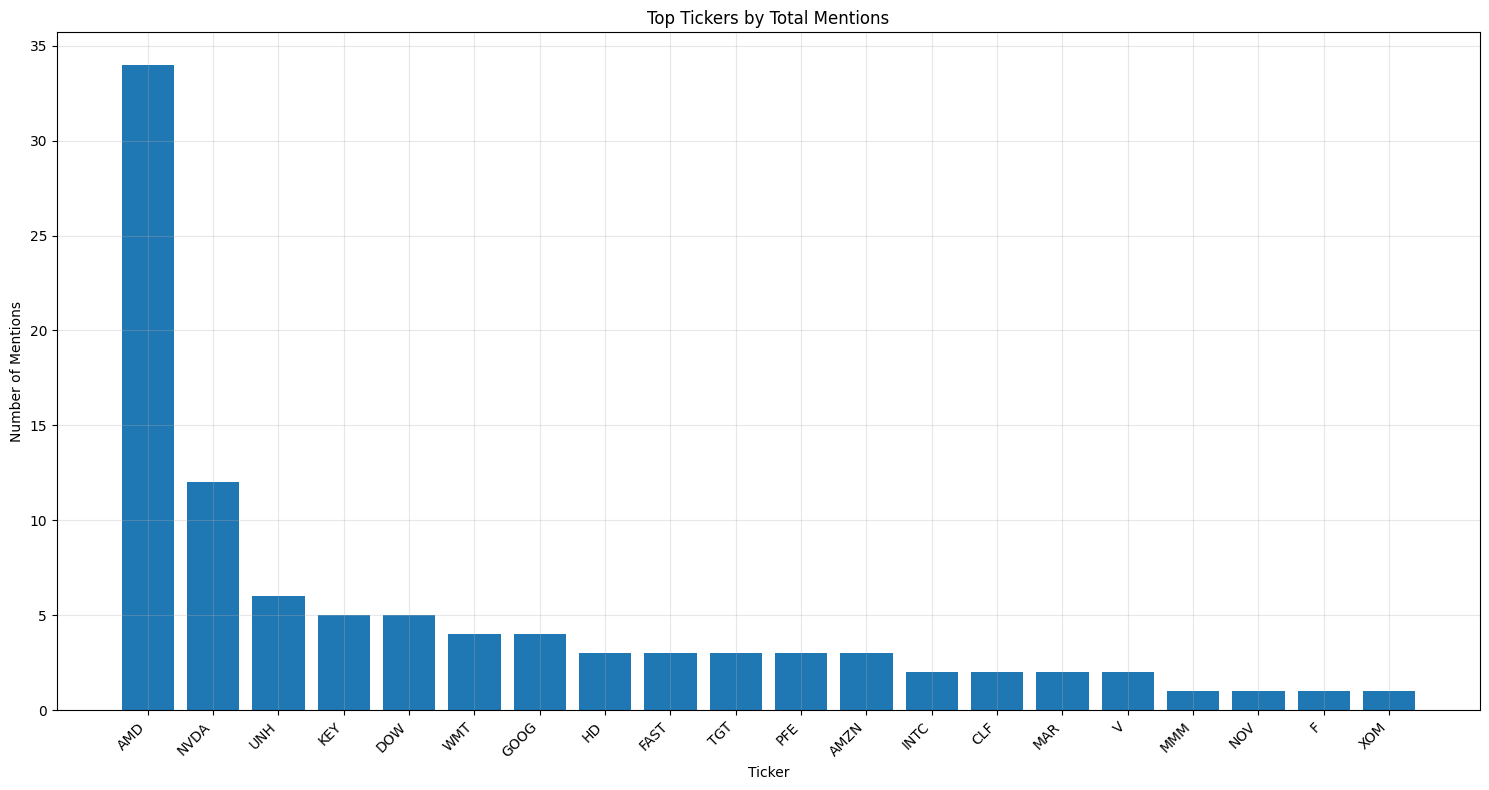

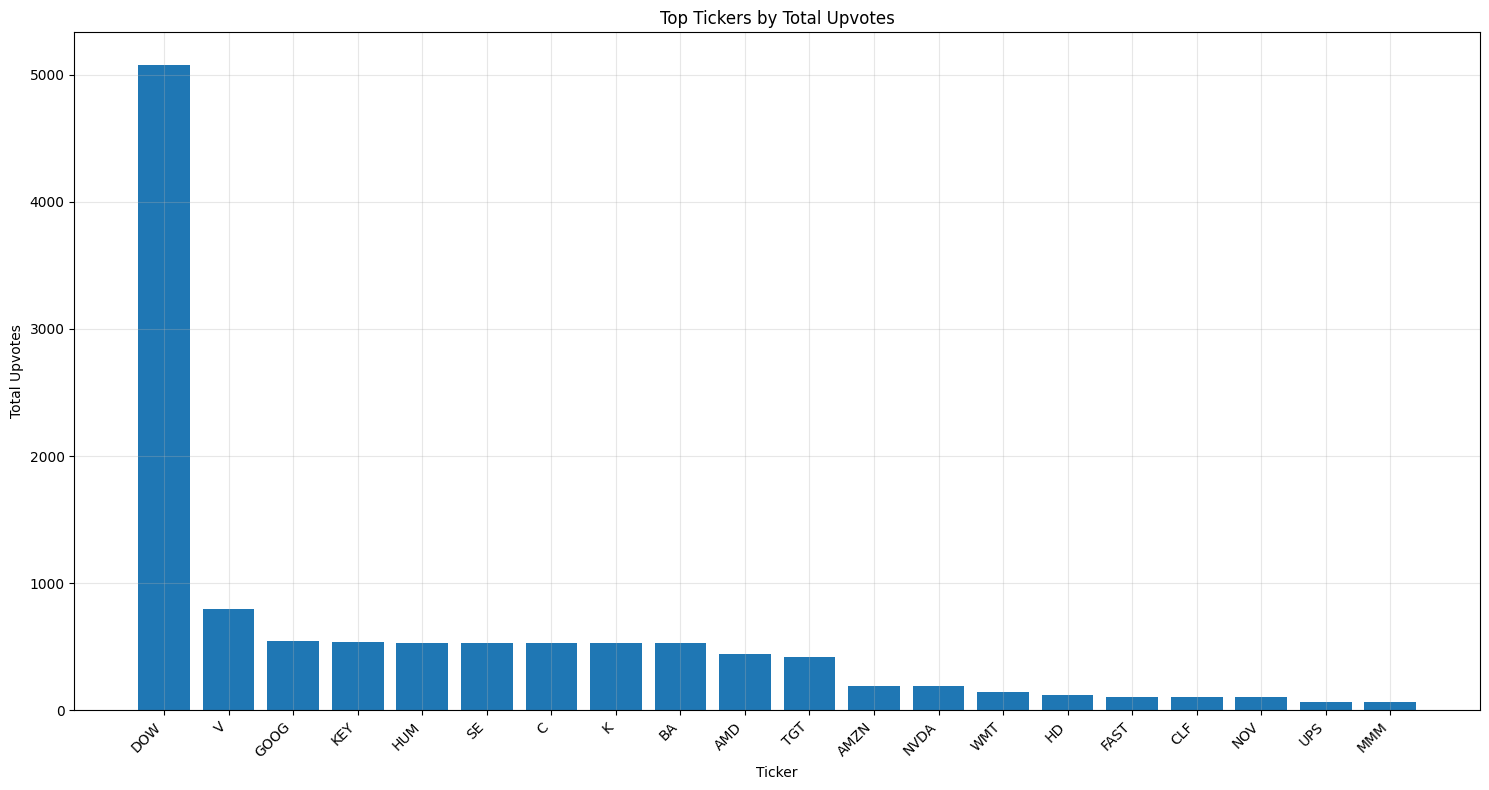

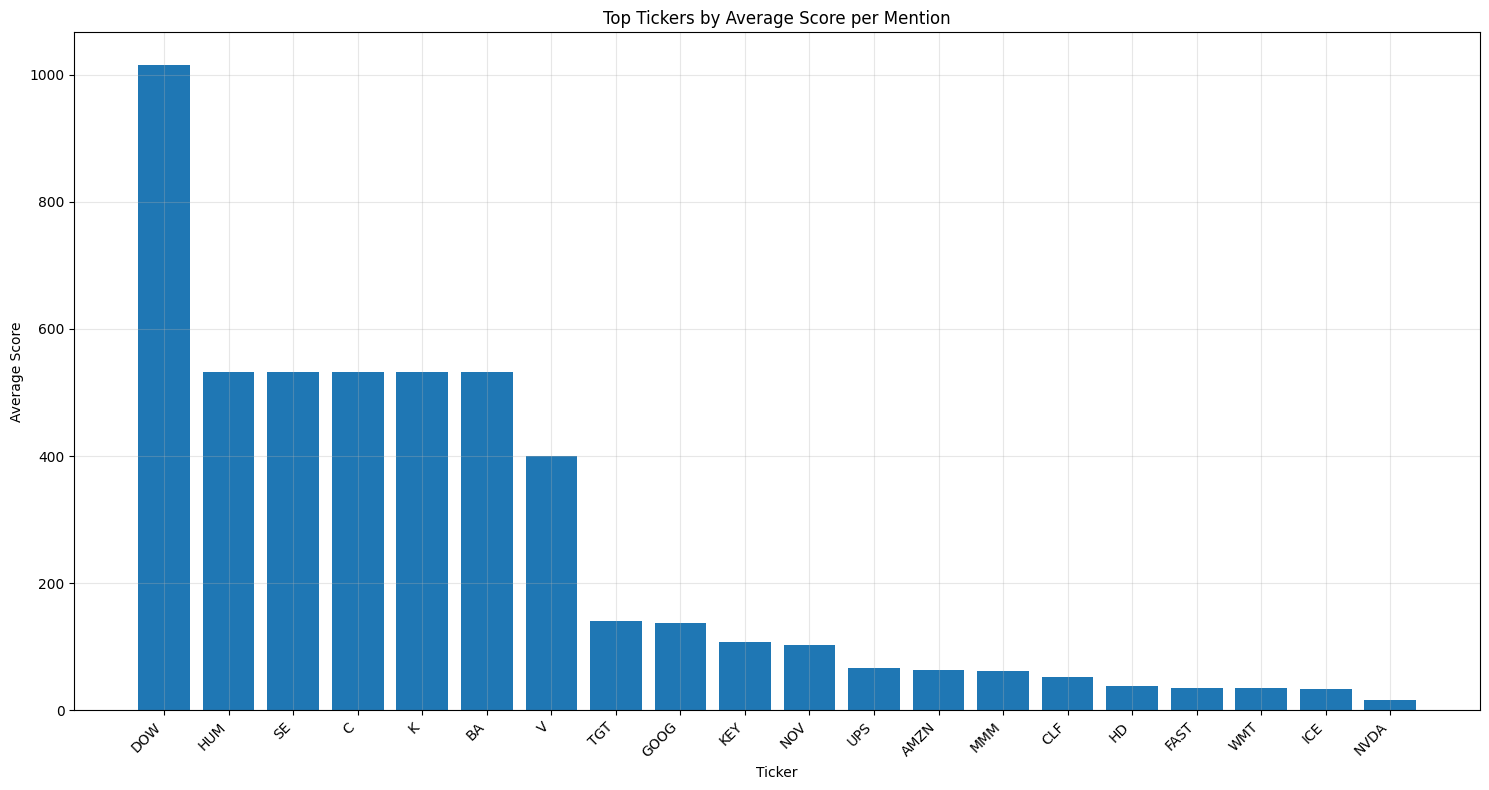


✓ Analysis saved to: wsb_analysis_20250223_015530.json

Summary Statistics:
  - Total posts analyzed: 18
  - Unique tickers found: 32
  - Total ticker mentions: 109
  - Total upvotes analyzed: 11696

✓ Summary CSV saved to: wsb_analysis_20250223_015530.csv


In [5]:
import asyncpraw
import re
import json
import asyncio
import aiohttp
from time import sleep
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
%matplotlib inline

# Reddit API Authentication
CLIENT_ID = "ayjJix181j8z0QOyQoPSbg"
CLIENT_SECRET = "VRLoz1o0NAPgIziOEAeY8Kb7Gr2e2Q"
USER_AGENT = "WSB_Scraper/1.0 by u/FlyingOoze43453"


def extract_mentions(text):
    """Extract both ticker symbols and company names from text."""
    if not text:
        return []
    
    found_tickers = set()
    
    # First check for exact ticker matches
    words = re.findall(r'\$?\b[A-Z0-9.-]+\b', text.upper())
    for word in words:
        clean_word = word.lstrip('$')
        if clean_word in MARKET_TICKERS:
            found_tickers.add(clean_word)
    
    # Then check for company name matches
    for company, ticker in COMPANY_TO_TICKER.items():
        if re.search(r'\b' + re.escape(company) + r'\b', text, re.IGNORECASE):
            found_tickers.add(ticker)
    
    return list(found_tickers)

async def create_reddit_client():
    """Create an asyncpraw Reddit instance with proper session handling"""
    return asyncpraw.Reddit(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        user_agent=USER_AGENT
    )

class AsyncRedditRateLimiter:
    def __init__(self):
        self.last_request = datetime.now()
        self.request_count = 0
        self.REQUESTS_PER_MINUTE = 50
        self.MIN_REQUEST_INTERVAL = 2
        
    async def wait_if_needed(self):
        now = datetime.now()
        time_since_last = (now - self.last_request).total_seconds()
        
        if time_since_last < self.MIN_REQUEST_INTERVAL:
            await asyncio.sleep(self.MIN_REQUEST_INTERVAL - time_since_last)
        
        if time_since_last >= 60:
            self.request_count = 0
        
        if self.request_count >= self.REQUESTS_PER_MINUTE:
            sleep_time = 60 - time_since_last
            if sleep_time > 0:
                print(f"Approaching rate limit, waiting {sleep_time:.1f} seconds...")
                await asyncio.sleep(sleep_time)
            self.request_count = 0
        
        self.request_count += 1
        self.last_request = datetime.now()


async def scrape_wsb_data(reddit, post_limit=50, comments_per_post=100):
    """
    Scrape WSB data using asyncpraw with proper comment loading.
    """
    wsb_data = []
    rate_limiter = AsyncRedditRateLimiter()
    posts_processed = 0
    
    try:
        print(f"Starting to scrape up to {post_limit} posts...")
        subreddit = await reddit.subreddit("wallstreetbets")
        
        async for submission in subreddit.new(limit=post_limit):
            try:
                await rate_limiter.wait_if_needed()
                
                # Fully load the submission
                full_submission = await reddit.submission(id=submission.id)
                await full_submission.load()
                
                title_tickers = extract_mentions(full_submission.title)
                selftext_tickers = extract_mentions(full_submission.selftext)
                
                post_info = {
                    "post_id": full_submission.id,
                    "title": full_submission.title or "",
                    "selftext": full_submission.selftext or "",
                    "created_utc": full_submission.created_utc,
                    "score": full_submission.score,
                    "upvote_ratio": full_submission.upvote_ratio,
                    "title_tickers": title_tickers,
                    "selftext_tickers": selftext_tickers,
                    "comments": []
                }
                
                if title_tickers or selftext_tickers:
                    try:
                        await rate_limiter.wait_if_needed()
                        
                        # Properly load comments
                        await full_submission.comments.replace_more(limit=0)
                        
                        # Process top-level comments
                        for comment in full_submission.comments:
                            if len(post_info["comments"]) >= comments_per_post:
                                break
                                
                            if hasattr(comment, 'body') and comment.body:
                                comment_tickers = extract_mentions(comment.body)
                                if comment_tickers:
                                    comment_data = {
                                        "comment_id": comment.id,
                                        "comment_body": comment.body,
                                        "tickers": comment_tickers,
                                        "score": comment.score,
                                        "created_utc": comment.created_utc
                                    }
                                    post_info["comments"].append(comment_data)
                    
                    except Exception as e:
                        print(f"Error processing comments for post {full_submission.id}: {str(e)}")
                
                if title_tickers or selftext_tickers or post_info["comments"]:
                    wsb_data.append(post_info)
                
                posts_processed += 1
                if posts_processed % 10 == 0:
                    print(f"Processed {posts_processed} posts...")
                
            except Exception as e:
                print(f"Error processing post {submission.id}: {str(e)}")
                continue
                
    except Exception as e:
        print(f"Fatal error during scraping: {str(e)}")
    
    print(f"Finished processing {posts_processed} posts.")
    return wsb_data

def analyze_ticker_mentions(wsb_data):
    """
    Analyze ticker mentions, their context, and aggregate upvotes
    """
    ticker_stats = defaultdict(lambda: {
        'total_mentions': 0,
        'total_upvotes': 0,
        'post_mentions': 0,
        'post_upvotes': 0,
        'comment_mentions': 0,
        'comment_upvotes': 0,
        'post_data': [],
        'comment_data': [],
        'contexts': {
            'titles': [],
            'comments': []
        }
    })
    
    for post in wsb_data:
        # Process title and selftext tickers
        all_post_tickers = set(post['title_tickers'] + post['selftext_tickers'])
        for ticker in all_post_tickers:
            ticker_stats[ticker]['total_mentions'] += 1
            ticker_stats[ticker]['post_mentions'] += 1
            ticker_stats[ticker]['total_upvotes'] += post['score']
            ticker_stats[ticker]['post_upvotes'] += post['score']
            
            # Store full post data
            ticker_stats[ticker]['post_data'].append({
                'post_id': post['post_id'],
                'title': post['title'],
                'selftext': post['selftext'],
                'score': post['score'],
                'upvote_ratio': post['upvote_ratio'],
                'created_utc': post['created_utc'],
                'mention_location': 'title' if ticker in post['title_tickers'] else 'selftext'
            })
            
            ticker_stats[ticker]['contexts']['titles'].append({
                'text': post['title'],
                'score': post['score'],
                'post_id': post['post_id']
            })
        
        # Process comments
        for comment in post['comments']:
            for ticker in comment['tickers']:
                ticker_stats[ticker]['total_mentions'] += 1
                ticker_stats[ticker]['comment_mentions'] += 1
                ticker_stats[ticker]['total_upvotes'] += comment['score']
                ticker_stats[ticker]['comment_upvotes'] += comment['score']
                
                # Store full comment data
                ticker_stats[ticker]['comment_data'].append({
                    'comment_id': comment['comment_id'],
                    'post_id': post['post_id'],
                    'post_title': post['title'],
                    'comment_body': comment['comment_body'],
                    'score': comment['score'],
                    'created_utc': comment['created_utc']
                })
                
                ticker_stats[ticker]['contexts']['comments'].append({
                    'text': comment['comment_body'],
                    'score': comment['score'],
                    'comment_id': comment['comment_id'],
                    'post_id': post['post_id']
                })
    
    return ticker_stats

def create_summary_df(ticker_stats):
    """
    Create a DataFrame summarizing ticker statistics
    """
    summary_data = []
    
    for ticker, stats in ticker_stats.items():
        avg_post_score = (stats['post_upvotes'] / stats['post_mentions'] 
                         if stats['post_mentions'] > 0 else 0)
        avg_comment_score = (stats['comment_upvotes'] / stats['comment_mentions'] 
                           if stats['comment_mentions'] > 0 else 0)
        
        summary_data.append({
            'ticker': ticker,
            'total_mentions': stats['total_mentions'],
            'total_upvotes': stats['total_upvotes'],
            'post_mentions': stats['post_mentions'],
            'post_upvotes': stats['post_upvotes'],
            'avg_post_score': avg_post_score,
            'comment_mentions': stats['comment_mentions'],
            'comment_upvotes': stats['comment_upvotes'],
            'avg_comment_score': avg_comment_score
        })
    
    return pd.DataFrame(summary_data)

def plot_ticker_analysis(ticker_stats, metric='mentions', top_n=20):
    """
    Plot ticker analysis with different metrics
    """
    plt.figure(figsize=(15, 8))
    
    if metric == 'mentions':
        data = {k: v['total_mentions'] for k, v in ticker_stats.items()}
        title = 'Top Tickers by Total Mentions'
        ylabel = 'Number of Mentions'
    elif metric == 'upvotes':
        data = {k: v['total_upvotes'] for k, v in ticker_stats.items()}
        title = 'Top Tickers by Total Upvotes'
        ylabel = 'Total Upvotes'
    elif metric == 'avg_score':
        data = {k: v['total_upvotes']/v['total_mentions'] 
               for k, v in ticker_stats.items() 
               if v['total_mentions'] > 0}
        title = 'Top Tickers by Average Score per Mention'
        ylabel = 'Average Score'
    
    # Sort and get top N
    sorted_data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True)[:top_n])
    
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Ticker')
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def save_results(wsb_data, ticker_stats):
    """
    Save all results to organized files with timestamps
    """
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Create summary data
    summary_data = {
        "metadata": {
            "scrape_time": timestamp,
            "total_posts_analyzed": len(wsb_data),
            "total_ticker_mentions": sum(stats['total_mentions'] for stats in ticker_stats.values()),
            "total_upvotes_analyzed": sum(stats['total_upvotes'] for stats in ticker_stats.values()),
            "unique_tickers_found": len(ticker_stats)
        },
        "ticker_stats": {
            ticker: {
                "total_mentions": stats['total_mentions'],
                "total_upvotes": stats['total_upvotes'],
                "post_mentions": stats['post_mentions'],
                "post_upvotes": stats['post_upvotes'],
                "comment_mentions": stats['comment_mentions'],
                "comment_upvotes": stats['comment_upvotes'],
                "avg_score_per_mention": (
                    stats['total_upvotes'] / stats['total_mentions'] 
                    if stats['total_mentions'] > 0 else 0
                ),
                "post_content": stats['post_data'],
                "comment_content": stats['comment_data']
            }
            for ticker, stats in ticker_stats.items()
        }
    }
    
    # Save to JSON
    filename = f'wsb_analysis_{timestamp}.json'
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(summary_data, f, indent=2, ensure_ascii=False)
        
        print(f"\n✓ Analysis saved to: {filename}")
        print("\nSummary Statistics:")
        print(f"  - Total posts analyzed: {len(wsb_data)}")
        print(f"  - Unique tickers found: {len(ticker_stats)}")
        print(f"  - Total ticker mentions: {summary_data['metadata']['total_ticker_mentions']}")
        print(f"  - Total upvotes analyzed: {summary_data['metadata']['total_upvotes_analyzed']}")
        
        # Save DataFrame
        df = create_summary_df(ticker_stats)
        csv_filename = f'wsb_analysis_{timestamp}.csv'
        df.to_csv(csv_filename, index=False)
        print(f"\n✓ Summary CSV saved to: {csv_filename}")
        
    except Exception as e:
        print(f"\n✗ Error saving results: {str(e)}")

async def main():
    """Main execution function"""
    print("Starting WSB analysis...")
    
    # Create Reddit instance
    reddit = await create_reddit_client()
    
    try:
        # Scrape data
        wsb_data = await scrape_wsb_data(reddit)
        
        if wsb_data:
            # Process data
            ticker_stats = analyze_ticker_mentions(wsb_data)
            
            if ticker_stats:
                # Create visualizations
                plot_ticker_analysis(ticker_stats, metric='mentions')
                plot_ticker_analysis(ticker_stats, metric='upvotes')
                plot_ticker_analysis(ticker_stats, metric='avg_score')
                
                # Save results
                save_results(wsb_data, ticker_stats)
            else:
                print("\nNo market tickers found in the scraped data.")
        else:
            print("\nNo data was scraped. Check your Reddit API credentials.")
            
    finally:
        # Ensure proper cleanup
        await reddit.close()

# For Jupyter notebooks
try:
    import nest_asyncio
    nest_asyncio.apply()
except ImportError:
    pass

# Execute the async script
if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())


In [ ]:
import asyncpraw
import re
import json
import asyncio
import aiohttp
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
%matplotlib inline

# Reddit API Authentication
CLIENT_ID = "ayjJix181j8z0QOyQoPSbg"
CLIENT_SECRET = "VRLoz1o0NAPgIziOEAeY8Kb7Gr2e2Q"
USER_AGENT = "WSB_Scraper/1.0 by u/FlyingOoze43453"

def extract_mentions(text):
    """Extract both ticker symbols and company names from text."""
    if not text:
        return []
    
    found_tickers = set()
    
    # First check for exact ticker matches
    words = re.findall(r'\$?\b[A-Z0-9.-]+\b', text.upper())
    for word in words:
        clean_word = word.lstrip('$')
        if clean_word in MARKET_TICKERS:
            found_tickers.add(clean_word)
    
    # Then check for company name matches
    for company, ticker in COMPANY_TO_TICKER.items():
        if re.search(r'\b' + re.escape(company) + r'\b', text, re.IGNORECASE):
            found_tickers.add(ticker)
    
    return list(found_tickers)

async def create_reddit_client():
    """Create an asyncpraw Reddit instance with proper session handling"""
    return asyncpraw.Reddit(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        user_agent=USER_AGENT
    )

class AsyncRedditRateLimiter:
    def __init__(self):
        self.last_request = datetime.now()
        self.request_count = 0
        self.REQUESTS_PER_MINUTE = 50
        self.MIN_REQUEST_INTERVAL = 2
        
    async def wait_if_needed(self):
        now = datetime.now()
        time_since_last = (now - self.last_request).total_seconds()
        
        if time_since_last < self.MIN_REQUEST_INTERVAL:
            await asyncio.sleep(self.MIN_REQUEST_INTERVAL - time_since_last)
        
        if time_since_last >= 60:
            self.request_count = 0
        
        if self.request_count >= self.REQUESTS_PER_MINUTE:
            sleep_time = 60 - time_since_last
            if sleep_time > 0:
                print(f"Approaching rate limit, waiting {sleep_time:.1f} seconds...")
                await asyncio.sleep(sleep_time)
            self.request_count = 0
        
        self.request_count += 1
        self.last_request = datetime.now()

async def scrape_wsb_data(reddit, post_limit=1500, comments_per_post=100):
    """
    Scrape WSB data using asyncpraw with proper comment loading.
    """
    wsb_data = []
    rate_limiter = AsyncRedditRateLimiter()
    posts_processed = 0
    
    try:
        print(f"Starting to scrape up to {post_limit} top posts from the past year...")
        subreddit = await reddit.subreddit("wallstreetbets")
        
        async for submission in subreddit.top("year", limit=post_limit):
            try:
                await rate_limiter.wait_if_needed()
                
                # Fully load the submission
                full_submission = await reddit.submission(id=submission.id)
                await full_submission.load()
                
                # Convert UTC timestamp to datetime
                post_date = datetime.fromtimestamp(full_submission.created_utc)
                
                title_tickers = extract_mentions(full_submission.title)
                selftext_tickers = extract_mentions(full_submission.selftext)
                
                post_info = {
                    "post_id": full_submission.id,
                    "title": full_submission.title or "",
                    "selftext": full_submission.selftext or "",
                    "created_utc": full_submission.created_utc,
                    "created_date": post_date.strftime("%Y-%m-%d %H:%M:%S"),
                    "score": full_submission.score,
                    "upvote_ratio": full_submission.upvote_ratio,
                    "title_tickers": title_tickers,
                    "selftext_tickers": selftext_tickers,
                    "comments": []
                }
                
                if title_tickers or selftext_tickers:
                    try:
                        await rate_limiter.wait_if_needed()
                        
                        # Properly load comments
                        await full_submission.comments.replace_more(limit=0)
                        
                        # Process top-level comments
                        for comment in full_submission.comments:
                            if len(post_info["comments"]) >= comments_per_post:
                                break
                                
                            if hasattr(comment, 'body') and comment.body:
                                comment_date = datetime.fromtimestamp(comment.created_utc)
                                comment_tickers = extract_mentions(comment.body)
                                if comment_tickers:
                                    comment_data = {
                                        "comment_id": comment.id,
                                        "comment_body": comment.body,
                                        "tickers": comment_tickers,
                                        "score": comment.score,
                                        "created_utc": comment.created_utc,
                                        "created_date": comment_date.strftime("%Y-%m-%d %H:%M:%S")
                                    }
                                    post_info["comments"].append(comment_data)
                    
                    except Exception as e:
                        print(f"Error processing comments for post {full_submission.id}: {str(e)}")
                
                if title_tickers or selftext_tickers or post_info["comments"]:
                    wsb_data.append(post_info)
                
                posts_processed += 1
                if posts_processed % 10 == 0:
                    print(f"Processed {posts_processed} posts...")
                
            except Exception as e:
                print(f"Error processing post {submission.id}: {str(e)}")
                continue
                
    except Exception as e:
        print(f"Fatal error during scraping: {str(e)}")
    
    print(f"Finished processing {posts_processed} posts.")
    return wsb_data

def analyze_ticker_mentions(wsb_data):
    """
    Analyze ticker mentions, their context, and aggregate upvotes
    """
    ticker_stats = defaultdict(lambda: {
        'total_mentions': 0,
        'total_upvotes': 0,
        'post_mentions': 0,
        'post_upvotes': 0,
        'comment_mentions': 0,
        'comment_upvotes': 0,
        'post_data': [],
        'comment_data': [],
        'temporal_data': defaultdict(lambda: {
            'mentions': 0,
            'upvotes': 0
        }),
        'contexts': {
            'titles': [],
            'comments': []
        }
    })
    
    for post in wsb_data:
        post_date = datetime.fromtimestamp(post['created_utc']).strftime("%Y-%m")
        
        # Process title and selftext tickers
        all_post_tickers = set(post['title_tickers'] + post['selftext_tickers'])
        for ticker in all_post_tickers:
            ticker_stats[ticker]['total_mentions'] += 1
            ticker_stats[ticker]['post_mentions'] += 1
            ticker_stats[ticker]['total_upvotes'] += post['score']
            ticker_stats[ticker]['post_upvotes'] += post['score']
            
            # Update temporal data
            ticker_stats[ticker]['temporal_data'][post_date]['mentions'] += 1
            ticker_stats[ticker]['temporal_data'][post_date]['upvotes'] += post['score']
            
            # Store full post data
            ticker_stats[ticker]['post_data'].append({
                'post_id': post['post_id'],
                'title': post['title'],
                'selftext': post['selftext'],
                'score': post['score'],
                'upvote_ratio': post['upvote_ratio'],
                'created_utc': post['created_utc'],
                'created_date': post['created_date'],
                'mention_location': 'title' if ticker in post['title_tickers'] else 'selftext'
            })
            
            ticker_stats[ticker]['contexts']['titles'].append({
                'text': post['title'],
                'score': post['score'],
                'post_id': post['post_id']
            })
        
        # Process comments
        for comment in post['comments']:
            comment_date = datetime.fromtimestamp(comment['created_utc']).strftime("%Y-%m")
            for ticker in comment['tickers']:
                ticker_stats[ticker]['total_mentions'] += 1
                ticker_stats[ticker]['comment_mentions'] += 1
                ticker_stats[ticker]['total_upvotes'] += comment['score']
                ticker_stats[ticker]['comment_upvotes'] += comment['score']
                
                # Update temporal data for comments
                ticker_stats[ticker]['temporal_data'][comment_date]['mentions'] += 1
                ticker_stats[ticker]['temporal_data'][comment_date]['upvotes'] += comment['score']
                
                # Store full comment data
                ticker_stats[ticker]['comment_data'].append({
                    'comment_id': comment['comment_id'],
                    'post_id': post['post_id'],
                    'post_title': post['title'],
                    'comment_body': comment['comment_body'],
                    'score': comment['score'],
                    'created_utc': comment['created_utc'],
                    'created_date': comment['created_date']
                })
                
                ticker_stats[ticker]['contexts']['comments'].append({
                    'text': comment['comment_body'],
                    'score': comment['score'],
                    'comment_id': comment['comment_id'],
                    'post_id': post['post_id']
                })
    
    return ticker_stats

def create_summary_df(ticker_stats):
    """
    Create a DataFrame summarizing ticker statistics
    """
    summary_data = []
    
    for ticker, stats in ticker_stats.items():
        avg_post_score = (stats['post_upvotes'] / stats['post_mentions'] 
                         if stats['post_mentions'] > 0 else 0)
        avg_comment_score = (stats['comment_upvotes'] / stats['comment_mentions'] 
                           if stats['comment_mentions'] > 0 else 0)
        
        summary_data.append({
            'ticker': ticker,
            'total_mentions': stats['total_mentions'],
            'total_upvotes': stats['total_upvotes'],
            'post_mentions': stats['post_mentions'],
            'post_upvotes': stats['post_upvotes'],
            'avg_post_score': avg_post_score,
            'comment_mentions': stats['comment_mentions'],
            'comment_upvotes': stats['comment_upvotes'],
            'avg_comment_score': avg_comment_score
        })
    
    return pd.DataFrame(summary_data)

def plot_ticker_analysis(ticker_stats, metric='mentions', top_n=20):
    """
    Plot ticker analysis with different metrics
    """
    plt.figure(figsize=(15, 8))
    
    if metric == 'mentions':
        data = {k: v['total_mentions'] for k, v in ticker_stats.items()}
        title = 'Top Tickers by Total Mentions'
        ylabel = 'Number of Mentions'
    elif metric == 'upvotes':
        data = {k: v['total_upvotes'] for k, v in ticker_stats.items()}
        title = 'Top Tickers by Total Upvotes'
        ylabel = 'Total Upvotes'
    elif metric == 'avg_score':
        data = {k: v['total_upvotes']/v['total_mentions'] 
               for k, v in ticker_stats.items() 
               if v['total_mentions'] > 0}
        title = 'Top Tickers by Average Score per Mention'
        ylabel = 'Average Score'
    
    # Sort and get top N
    sorted_data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True)[:top_n])
    
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Ticker')
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_temporal_analysis(ticker_stats, ticker, metric='mentions'):
    """
    Plot temporal analysis for a specific ticker
    """
    plt.figure(figsize=(15, 8))
    
    temporal_data = ticker_stats[ticker]['temporal_data']
    dates = sorted(temporal_data.keys())
    
    if metric == 'mentions':
        values = [temporal_data[date]['mentions'] for date in dates]
        title = f'Mentions Over Time for {ticker}'
        ylabel = 'Number of Mentions'
    else:  # upvotes
        values = [temporal_data[date]['upvotes'] for date in dates]
        title = f'Upvotes Over Time for {ticker}'
        ylabel = 'Total Upvotes'
    
    plt.plot(dates, values, marker='o')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel('Date (YYYY-MM)')
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def save_results(wsb_data, ticker_stats):
    """
    Save all results to organized files with timestamps
    """
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Create summary data
    summary_data = {
        "metadata": {
            "scrape_time": timestamp,
            "total_posts_analyzed": len(wsb_data),
            "total_ticker_mentions": sum(stats['total_mentions'] for stats in ticker_stats.values()),
            "total_upvotes_analyzed": sum(stats['total_upvotes'] for stats in ticker_stats.values()),
            "unique_tickers_found": len(ticker_stats)
        },
        "ticker_stats": {
            ticker: {
                "total_mentions": stats['total_mentions'],
                "total_upvotes": stats['total_upvotes'],
                "post_mentions": stats['post_mentions'],
                "post_upvotes": stats['post_upvotes'],
                "comment_mentions": stats['comment_mentions'],
                "comment_upvotes": stats['comment_upvotes'],
                "avg_score_per_mention": (
                    stats['total_upvotes'] / stats['total_mentions'] 
                    if stats['total_mentions'] > 0 else 0
                ),
                "post_content": stats['post_data'],
                "comment_content": stats['comment_data'],
                "temporal_analysis": {
                    date: {
                        "mentions": data["mentions"],
                        "upvotes": data["upvotes"]
                    }
                    for date, data in stats['temporal_data'].items()
                },
                "post_content": stats['post_data'],
                "comment_content": stats['comment_data']
            }
            for ticker, stats in ticker_stats.items()
        }
    }
    
    # Save to JSON
    filename = f'wsb_analysis_{timestamp}.json'
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(summary_data, f, indent=2, ensure_ascii=False)
        
        print(f"\n✓ Analysis saved to: {filename}")
        print("\nSummary Statistics:")
        print(f"  - Total posts analyzed: {len(wsb_data)}")
        print(f"  - Unique tickers found: {len(ticker_stats)}")
        print(f"  - Total ticker mentions: {summary_data['metadata']['total_ticker_mentions']}")
        print(f"  - Total upvotes analyzed: {summary_data['metadata']['total_upvotes_analyzed']}")
        
        # Save DataFrame
        df = create_summary_df(ticker_stats)
        csv_filename = f'wsb_analysis_{timestamp}.csv'
        df.to_csv(csv_filename, index=False)
        print(f"\n✓ Summary CSV saved to: {csv_filename}")
        
    except Exception as e:
        print(f"\n✗ Error saving results: {str(e)}")

async def main():
    """Main execution function"""
    print("Starting WSB analysis of top posts from the past year...")
    
    # Create Reddit instance
    reddit = await create_reddit_client()
    
    try:
        # Scrape data
        wsb_data = await scrape_wsb_data(reddit)
        
        if wsb_data:
            # Process data
            ticker_stats = analyze_ticker_mentions(wsb_data)
            
            if ticker_stats:
                # Create standard visualizations
                plot_ticker_analysis(ticker_stats, metric='mentions')
                plot_ticker_analysis(ticker_stats, metric='upvotes')
                plot_ticker_analysis(ticker_stats, metric='avg_score')
                
                # Create temporal visualizations for top mentioned tickers
                top_tickers = sorted(
                    ticker_stats.items(),
                    key=lambda x: x[1]['total_mentions'],
                    reverse=True
                )[:5]
                
                for ticker, _ in top_tickers:
                    plot_temporal_analysis(ticker_stats, ticker, 'mentions')
                    plot_temporal_analysis(ticker_stats, ticker, 'upvotes')
                
                # Save results
                save_results(wsb_data, ticker_stats)
            else:
                print("\nNo market tickers found in the scraped data.")
        else:
            print("\nNo data was scraped. Check your Reddit API credentials.")
            
    finally:
        # Ensure proper cleanup
        await reddit.close()

# For Jupyter notebooks
try:
    import nest_asyncio
    nest_asyncio.apply()
except ImportError:
    pass

# Execute the async script
if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())

In [ ]:
import asyncpraw
import re
import json
import asyncio
import aiohttp
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import os

# Reddit API Authentication
CLIENT_ID = "ayjJix181j8z0QOyQoPSbg"
CLIENT_SECRET = "VRLoz1o0NAPgIziOEAeY8Kb7Gr2e2Q"
USER_AGENT = "WSB_Scraper/1.0 by u/FlyingOoze43453"

def extract_mentions(text):
    """Extract both ticker symbols and company names from text."""
    if not text:
        return []
    
    found_tickers = set()
    
    # First check for exact ticker matches
    words = re.findall(r'\$?\b[A-Z0-9.-]+\b', text.upper())
    for word in words:
        clean_word = word.lstrip('$')
        if clean_word in MARKET_TICKERS:
            found_tickers.add(clean_word)
    
    # Then check for company name matches
    for company, ticker in COMPANY_TO_TICKER.items():
        if re.search(r'\b' + re.escape(company) + r'\b', text, re.IGNORECASE):
            found_tickers.add(ticker)
    
    return list(found_tickers)

async def create_reddit_client():
    """Create an asyncpraw Reddit instance with proper session handling"""
    return asyncpraw.Reddit(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        user_agent=USER_AGENT
    )

class AsyncRedditRateLimiter:
    def __init__(self):
        self.last_request = datetime.now()
        self.request_count = 0
        self.REQUESTS_PER_MINUTE = 50
        self.MIN_REQUEST_INTERVAL = 2
        
    async def wait_if_needed(self):
        now = datetime.now()
        time_since_last = (now - self.last_request).total_seconds()
        
        if time_since_last < self.MIN_REQUEST_INTERVAL:
            await asyncio.sleep(self.MIN_REQUEST_INTERVAL - time_since_last)
        
        if time_since_last >= 60:
            self.request_count = 0
        
        if self.request_count >= self.REQUESTS_PER_MINUTE:
            sleep_time = 60 - time_since_last
            if sleep_time > 0:
                print(f"Approaching rate limit, waiting {sleep_time:.1f} seconds...")
                await asyncio.sleep(sleep_time)
            self.request_count = 0
        
        self.request_count += 1
        self.last_request = datetime.now()

async def scrape_wsb_data(reddit, post_limit=100, comments_per_post=100):
    """
    Scrape WSB data using asyncpraw with proper comment loading.
    """
    wsb_data = []
    rate_limiter = AsyncRedditRateLimiter()
    posts_processed = 0
    
    try:
        print(f"Starting to scrape up to {post_limit} top posts from the past year...")
        subreddit = await reddit.subreddit("wallstreetbets")
        
        async for submission in subreddit.top("year", limit=post_limit):
            try:
                await rate_limiter.wait_if_needed()
                
                # Fully load the submission
                full_submission = await reddit.submission(id=submission.id)
                await full_submission.load()
                
                # Convert UTC timestamp to datetime
                post_date = datetime.fromtimestamp(full_submission.created_utc)
                
                title_tickers = extract_mentions(full_submission.title)
                selftext_tickers = extract_mentions(full_submission.selftext)
                
                post_info = {
                    "post_id": full_submission.id,
                    "title": full_submission.title or "",
                    "selftext": full_submission.selftext or "",
                    "created_utc": full_submission.created_utc,
                    "created_date": post_date.strftime("%Y-%m-%d %H:%M:%S"),
                    "score": full_submission.score,
                    "upvote_ratio": full_submission.upvote_ratio,
                    "title_tickers": title_tickers,
                    "selftext_tickers": selftext_tickers,
                    "comments": []
                }
                
                if title_tickers or selftext_tickers:
                    try:
                        await rate_limiter.wait_if_needed()
                        
                        # Properly load comments
                        await full_submission.comments.replace_more(limit=0)
                        
                        # Process top-level comments
                        for comment in full_submission.comments:
                            if len(post_info["comments"]) >= comments_per_post:
                                break
                                
                            if hasattr(comment, 'body') and comment.body:
                                comment_date = datetime.fromtimestamp(comment.created_utc)
                                comment_tickers = extract_mentions(comment.body)
                                if comment_tickers:
                                    comment_data = {
                                        "comment_id": comment.id,
                                        "comment_body": comment.body,
                                        "tickers": comment_tickers,
                                        "score": comment.score,
                                        "created_utc": comment.created_utc,
                                        "created_date": comment_date.strftime("%Y-%m-%d %H:%M:%S")
                                    }
                                    post_info["comments"].append(comment_data)
                    
                    except Exception as e:
                        print(f"Error processing comments for post {full_submission.id}: {str(e)}")
                
                if title_tickers or selftext_tickers or post_info["comments"]:
                    wsb_data.append(post_info)
                
                posts_processed += 1
                if posts_processed % 10 == 0:
                    print(f"Processed {posts_processed} posts...")
                
            except Exception as e:
                print(f"Error processing post {submission.id}: {str(e)}")
                continue
                
    except Exception as e:
        print(f"Fatal error during scraping: {str(e)}")
    
    print(f"Finished processing {posts_processed} posts.")
    return wsb_data

def analyze_ticker_mentions(wsb_data):
    """
    Analyze ticker mentions, their context, and aggregate upvotes
    """
    ticker_stats = defaultdict(lambda: {
        'total_mentions': 0,
        'total_upvotes': 0,
        'post_mentions': 0,
        'post_upvotes': 0,
        'comment_mentions': 0,
        'comment_upvotes': 0,
        'post_data': [],
        'comment_data': [],
        'temporal_data': defaultdict(lambda: {
            'mentions': 0,
            'upvotes': 0
        }),
        'contexts': {
            'titles': [],
            'comments': []
        }
    })
    
    for post in wsb_data:
        post_date = datetime.fromtimestamp(post['created_utc']).strftime("%Y-%m")
        
        # Process title and selftext tickers
        all_post_tickers = set(post['title_tickers'] + post['selftext_tickers'])
        for ticker in all_post_tickers:
            ticker_stats[ticker]['total_mentions'] += 1
            ticker_stats[ticker]['post_mentions'] += 1
            ticker_stats[ticker]['total_upvotes'] += post['score']
            ticker_stats[ticker]['post_upvotes'] += post['score']
            
            # Update temporal data
            ticker_stats[ticker]['temporal_data'][post_date]['mentions'] += 1
            ticker_stats[ticker]['temporal_data'][post_date]['upvotes'] += post['score']
            
            # Store full post data
            ticker_stats[ticker]['post_data'].append({
                'post_id': post['post_id'],
                'title': post['title'],
                'selftext': post['selftext'],
                'score': post['score'],
                'upvote_ratio': post['upvote_ratio'],
                'created_utc': post['created_utc'],
                'created_date': post['created_date']
            })
            
            ticker_stats[ticker]['contexts']['titles'].append({
                'text': post['title'],
                'score': post['score'],
                'post_id': post['post_id']
            })
        
        # Process comments
        for comment in post['comments']:
            comment_date = datetime.fromtimestamp(comment['created_utc']).strftime("%Y-%m")
            for ticker in comment['tickers']:
                ticker_stats[ticker]['total_mentions'] += 1
                ticker_stats[ticker]['comment_mentions'] += 1
                ticker_stats[ticker]['total_upvotes'] += comment['score']
                ticker_stats[ticker]['comment_upvotes'] += comment['score']
                
                # Update temporal data for comments
                ticker_stats[ticker]['temporal_data'][comment_date]['mentions'] += 1
                ticker_stats[ticker]['temporal_data'][comment_date]['upvotes'] += comment['score']
                
                # Store full comment data
                ticker_stats[ticker]['comment_data'].append({
                    'comment_id': comment['comment_id'],
                    'post_id': post['post_id'],
                    'post_title': post['title'],
                    'comment_body': comment['comment_body'],
                    'score': comment['score'],
                    'created_utc': comment['created_utc'],
                    'created_date': comment['created_date']
                })
                
                ticker_stats[ticker]['contexts']['comments'].append({
                    'text': comment['comment_body'],
                    'score': comment['score'],
                    'comment_id': comment['comment_id'],
                    'post_id': post['post_id']
                })
    
    return ticker_stats

def create_summary_df(ticker_stats):
    """
    Create a DataFrame summarizing ticker statistics
    """
    summary_data = []
    
    for ticker, stats in ticker_stats.items():
        avg_post_score = (stats['post_upvotes'] / stats['post_mentions'] 
                         if stats['post_mentions'] > 0 else 0)
        avg_comment_score = (stats['comment_upvotes'] / stats['comment_mentions'] 
                           if stats['comment_mentions'] > 0 else 0)
        
        summary_data.append({
            'ticker': ticker,
            'total_mentions': stats['total_mentions'],
            'total_upvotes': stats['total_upvotes'],
            'post_mentions': stats['post_mentions'],
            'post_upvotes': stats['post_upvotes'],
            'avg_post_score': avg_post_score,
            'comment_mentions': stats['comment_mentions'],
            'comment_upvotes': stats['comment_upvotes'],
            'avg_comment_score': avg_comment_score
        })
    
    return pd.DataFrame(summary_data)

# Create a directory for saving visualizations
def create_output_directories(timestamp):
    """Create directories for saving outputs"""
    vis_dir = f'visualizations_{timestamp}'
    os.makedirs(vis_dir, exist_ok=True)
    return vis_dir

def save_plot(plt, filename, vis_dir):
    """Save plot to file and close the figure to prevent memory leaks"""
    filepath = os.path.join(vis_dir, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.close()

def plot_ticker_analysis(ticker_stats, metric='mentions', top_n=20, vis_dir=None):
    """
    Plot and save ticker analysis with different metrics
    """
    plt.figure(figsize=(15, 8))
    
    if metric == 'mentions':
        data = {k: v['total_mentions'] for k, v in ticker_stats.items()}
        title = 'Top Tickers by Total Mentions'
        ylabel = 'Number of Mentions'
        filename = 'top_tickers_mentions.png'
    elif metric == 'upvotes':
        data = {k: v['total_upvotes'] for k, v in ticker_stats.items()}
        title = 'Top Tickers by Total Upvotes'
        ylabel = 'Total Upvotes'
        filename = 'top_tickers_upvotes.png'
    elif metric == 'avg_score':
        data = {k: v['total_upvotes']/v['total_mentions'] 
               for k, v in ticker_stats.items() 
               if v['total_mentions'] > 0}
        title = 'Top Tickers by Average Score per Mention'
        ylabel = 'Average Score'
        filename = 'top_tickers_avg_score.png'
    
    # Sort and get top N
    sorted_data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True)[:top_n])
    
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Ticker')
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Save plot instead of showing
    save_plot(plt, filename, vis_dir)
    return filename

def plot_temporal_analysis(ticker_stats, ticker, metric='mentions', vis_dir=None):
    """
    Plot and save temporal analysis for a specific ticker
    """
    plt.figure(figsize=(15, 8))
    
    temporal_data = ticker_stats[ticker]['temporal_data']
    dates = sorted(temporal_data.keys())
    
    if metric == 'mentions':
        values = [temporal_data[date]['mentions'] for date in dates]
        title = f'Mentions Over Time for {ticker}'
        ylabel = 'Number of Mentions'
        filename = f'temporal_mentions_{ticker}.png'
    else:  # upvotes
        values = [temporal_data[date]['upvotes'] for date in dates]
        title = f'Upvotes Over Time for {ticker}'
        ylabel = 'Total Upvotes'
        filename = f'temporal_upvotes_{ticker}.png'
    
    plt.plot(dates, values, marker='o')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel('Date (YYYY-MM)')
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Save plot instead of showing
    save_plot(plt, filename, vis_dir)
    return filename

def save_results(wsb_data, ticker_stats, vis_dir):
    """
    Save all results to organized files with timestamps
    """
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Create a list to store visualization filenames
    visualization_files = []
    
    # Generate and save standard visualizations
    visualization_files.extend([
        plot_ticker_analysis(ticker_stats, metric='mentions', vis_dir=vis_dir),
        plot_ticker_analysis(ticker_stats, metric='upvotes', vis_dir=vis_dir),
        plot_ticker_analysis(ticker_stats, metric='avg_score', vis_dir=vis_dir)
    ])
    
    # Generate and save temporal visualizations for top tickers
    top_tickers = sorted(
        ticker_stats.items(),
        key=lambda x: x[1]['total_mentions'],
        reverse=True
    )[:5]
    
    for ticker, _ in top_tickers:
        visualization_files.extend([
            plot_temporal_analysis(ticker_stats, ticker, 'mentions', vis_dir=vis_dir),
            plot_temporal_analysis(ticker_stats, ticker, 'upvotes', vis_dir=vis_dir)
        ])
    
    # Create summary data with visualization file references
    summary_data = {
        "metadata": {
            "scrape_time": timestamp,
            "total_posts_analyzed": len(wsb_data),
            "total_ticker_mentions": sum(stats['total_mentions'] for stats in ticker_stats.values()),
            "total_upvotes_analyzed": sum(stats['total_upvotes'] for stats in ticker_stats.values()),
            "unique_tickers_found": len(ticker_stats),
            "visualization_files": {
                "general": [
                    "top_tickers_mentions.png",
                    "top_tickers_upvotes.png",
                    "top_tickers_avg_score.png"
                ],
                "temporal": {ticker: [
                    f"temporal_mentions_{ticker}.png",
                    f"temporal_upvotes_{ticker}.png"
                ] for ticker, _ in top_tickers}
            }
        },
        "ticker_stats": {
            ticker: {
                "total_mentions": stats['total_mentions'],
                "total_upvotes": stats['total_upvotes'],
                "post_mentions": stats['post_mentions'],
                "post_upvotes": stats['post_upvotes'],
                "comment_mentions": stats['comment_mentions'],
                "comment_upvotes": stats['comment_upvotes'],
                "avg_score_per_mention": (
                    stats['total_upvotes'] / stats['total_mentions'] 
                    if stats['total_mentions'] > 0 else 0
                ),
                "temporal_analysis": {
                    date: {
                        "mentions": data["mentions"],
                        "upvotes": data["upvotes"]
                    }
                    for date, data in stats['temporal_data'].items()
                },
                "post_content": stats['post_data'],
                "comment_content": stats['comment_data']
            }
            for ticker, stats in ticker_stats.items()
        }
    }
    
    # Save to JSON
    filename = f'wsb_analysis_{timestamp}.json'
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(summary_data, f, indent=2, ensure_ascii=False)
        
        print(f"\n✓ Analysis saved to: {filename}")
        print(f"\n✓ Visualizations saved to: {vis_dir}/")
        print("\nSummary Statistics:")
        print(f"  - Total posts analyzed: {len(wsb_data)}")
        print(f"  - Unique tickers found: {len(ticker_stats)}")
        print(f"  - Total ticker mentions: {summary_data['metadata']['total_ticker_mentions']}")
        print(f"  - Total upvotes analyzed: {summary_data['metadata']['total_upvotes_analyzed']}")
        
        # Save DataFrame
        df = create_summary_df(ticker_stats)
        csv_filename = f'wsb_analysis_{timestamp}.csv'
        df.to_csv(csv_filename, index=False)
        print(f"\n✓ Summary CSV saved to: {csv_filename}")
        
    except Exception as e:
        print(f"\n✗ Error saving results: {str(e)}")

async def main():
    """Main execution function"""
    print("Starting WSB analysis of top posts from the past year...")
    
    # Create timestamp and directories
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    vis_dir = create_output_directories(timestamp)
    
    # Create Reddit instance
    reddit = await create_reddit_client()
    
    try:
        # Scrape data
        wsb_data = await scrape_wsb_data(reddit)
        
        if wsb_data:
            # Process data
            ticker_stats = analyze_ticker_mentions(wsb_data)
            
            if ticker_stats:
                # Save results with visualizations
                save_results(wsb_data, ticker_stats, vis_dir)
            else:
                print("\nNo market tickers found in the scraped data.")
        else:
            print("\nNo data was scraped. Check your Reddit API credentials.")
            
    finally:
        # Ensure proper cleanup
        await reddit.close()

# For Jupyter notebooks
try:
    import nest_asyncio
    nest_asyncio.apply()
except ImportError:
    pass

# Execute the async script
if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())

Starting WSB analysis of top posts from the past year...
Starting to scrape up to 100 top posts from the past year...
Processed 10 posts...
